Integration of Henon-Heiles potential, equations of motion

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [4]:
def fun(y, t, eps):
    v1 = -y[0]-2*eps*y[0]*y[1]
    v2 = -y[1]-eps*(y[0]**2-y[1]**2)
    return np.array([y[2], y[3], v1, v2])
def egy(y, eps):
    return 0.5*(y[0]**2+y[1]**2+y[2]**2+y[3]**2)+ eps*(y[0]**2*y[1]-y[1]**3/3.0)

In [25]:
eps = 1
#energy = 0.01
#energy = 0.1
energy = 0.125
#energy = 1/6.0
ind_t = 2
ind_y = 0
t_mat_end = np.array([20, 500, 1000, 32000])
t_mat_num = np.array([200, 10000, 20000, 200000])
t_mat_y = np.array([0.096, 0.03, 0.2, 0.4, 0.45])
t_end = t_mat_end[ind_t]
t_num = t_mat_num[ind_t]
y1 = 0.0
y2 = 0.095
dot_y2 = t_mat_y[ind_y]
dot_y1 = np.sqrt(2.0)*np.sqrt(energy-egy(np.array([y1, y2, 0.0, dot_y2]),eps))
y0 = np.array([y1, y2, dot_y1, dot_y2])

In [26]:
time = np.linspace(0, t_end, t_num)
solv = odeint(fun, y0, time, args=(eps,))

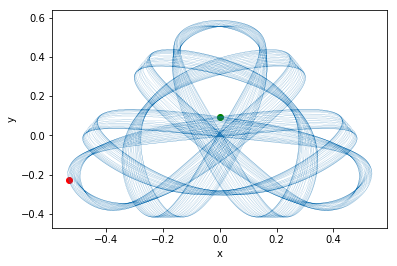

In [27]:
plt.plot(solv[0,0], solv[0,1],'og')
plt.plot(solv[-1,0],solv[-1,1], 'or')
plt.plot(solv[:, 0], solv[:, 1], linewidth=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Let us find the index where the $x$-coordinate changes sign

In [28]:
ind_x_zero = np.where((np.diff(np.sign(solv[:,0])) != 0)*1)

This is the Poincare map

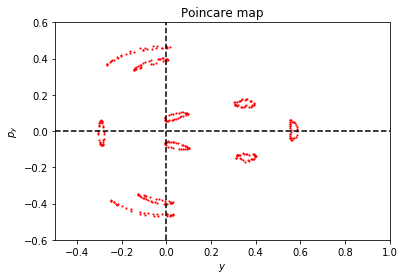

In [29]:

xmax = np.array([-0.5, 1])
ymax = np.array([-0.6, 0.6])
plt.title('Poincare map')
for ind in ind_x_zero:
    plt.plot(solv[ind,1], solv[ind,3],'sr', markersize=1)
plt.plot(xmax, np.zeros(2),'--k')
plt.plot(np.zeros(2), ymax,'--k')
plt.xlim(xmax)
plt.ylim(ymax)
plt.xlabel(r'$y$')
plt.ylabel(r'$p_y$')
plt.show()

Let us check energy conservation

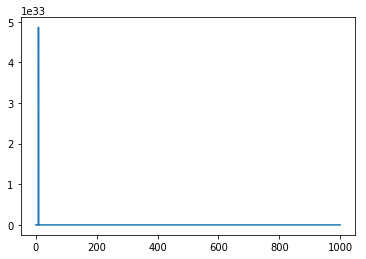

In [24]:
plt.plot(time, egy(solv.T, eps)/energy-1)
plt.show()

Let us histogram the momentum

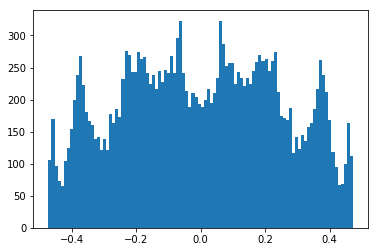

In [18]:
plt.hist(solv[:, 3], bins=100)
plt.show()

It is not a Gaussian, as you can notice